In [28]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib as plt

In [31]:
income = pd.read_csv('Source/inc_data.csv')
income.head()
# print(income.dtypes)
# how to look at its datatype?

,GeoId,tractsId,Families Median income
0,36005000100,1.0,-
1,36005000200,2.0,66488
2,36005000400,4.0,90118
3,36005001600,16.0,40577
4,36005001900,19.0,41447


In [30]:
rent = pd.read_csv('Source/rent_tracts.csv', dtype= {'GeoId':str, 'Gross median rent':str})
rent.head()
# GeoId has NA value
# gross median income has "2000+"

,GeoId,tractId,Gross median rent
0,36005000100,1.0,-
1,36005000200,2.0,1273
2,36005000400,4.0,1330
3,36005001600,16.0,823
4,36005001900,19.0,870


In [24]:
print(rent.dtypes)

GeoId                 object
tractId              float64
Gross median rent     object
dtype: object


In [21]:
income_rent_over50percent = pd.read_csv('Source/track_data_upload_2.csv')
income_rent_over50percent.head()

,id,Geographic Area Name,% over 50 percent
0,36061003700,37.00,16.1
1,36061008601,86.01,20.4
2,36061004400,44.00,17.7
3,36061008603,86.03,27.7
4,36061008602,86.02,0.0


In [22]:
print(income_rent_over50percent.dtypes)

id                        int64
Geographic Area Name    float64
% over 50 percent       float64
dtype: object


In [33]:
tract = geopandas.read_file('Source/2010 Census Tracts.geojson')
tract.head()
# print(income.dtypes())

,ntacode,shape_area,ntaname,shape_leng,boro_name,puma,ct2010,boro_code,cdeligibil,boro_ct2010,ctlabel,geometry
0,SI22,2497009.71359,West New Brighton-New Brighton-St. George,7729.01679383,Staten Island,3903,000900,5,E,5000900,9,"MULTIPOLYGON (((-74.07921 40.64343, -74.07914 ..."
1,MN19,1906016.35002,Turtle Bay-East Midtown,5534.19981063,Manhattan,3808,009800,1,I,1009800,98,"MULTIPOLYGON (((-73.96433 40.75638, -73.96479 ..."
2,MN19,1860938.37721,Turtle Bay-East Midtown,5692.16873705,Manhattan,3808,010000,1,I,1010000,100,"MULTIPOLYGON (((-73.96802 40.75958, -73.96848 ..."
3,MN17,1860992.70485,Midtown-Midtown South,5687.80243866,Manhattan,3807,010200,1,I,1010200,102,"MULTIPOLYGON (((-73.97124 40.76094, -73.97170 ..."
4,MN17,1864600.37503,Midtown-Midtown South,5693.03636655,Manhattan,3807,010400,1,I,1010400,104,"MULTIPOLYGON (((-73.97446 40.76229, -73.97491 ..."


In [34]:
len(income)

2167

In [35]:
len(rent)

1045858

In [36]:
len(income_rent_over50percent)

2165

In [46]:
len(tract.geometry)

2165

In [38]:
income['new_geo_id'] = income['GeoId'].apply(lambda s:str(s)[4:])

,GeoId,tractsId,Families Median income,new_geo_id
0,36005000100,1.0,-,5000100
1,36005000200,2.0,66488,5000200
2,36005000400,4.0,90118,5000400
3,36005001600,16.0,40577,5001600
4,36005001900,19.0,41447,5001900


In [39]:
income.head()

,GeoId,tractsId,Families Median income,new_geo_id
0,36005000100,1.0,-,5000100
1,36005000200,2.0,66488,5000200
2,36005000400,4.0,90118,5000400
3,36005001600,16.0,40577,5001600
4,36005001900,19.0,41447,5001900


In [40]:
# with income
tract_01 = pd.merge(tract, income, how='inner', left_on='boro_ct2010', right_on='new_geo_id').drop(columns='GeoId')

In [41]:
tract_01.head()

,ntacode,shape_area,ntaname,shape_leng,boro_name,puma,ct2010,boro_code,cdeligibil,boro_ct2010,ctlabel,geometry,tractsId,Families Median income,new_geo_id
0,SI22,2497009.71359,West New Brighton-New Brighton-St. George,7729.01679383,Staten Island,3903,000900,5,E,5000900,9,"MULTIPOLYGON (((-74.07921 40.64343, -74.07914 ...",9.0,77936,5000900
1,MN19,1906016.35002,Turtle Bay-East Midtown,5534.19981063,Manhattan,3808,009800,1,I,1009800,98,"MULTIPOLYGON (((-73.96433 40.75638, -73.96479 ...",98.0,"250,000+",1009800
2,MN19,1906016.35002,Turtle Bay-East Midtown,5534.19981063,Manhattan,3808,009800,1,I,1009800,98,"MULTIPOLYGON (((-73.96433 40.75638, -73.96479 ...",98.0,76087,1009800
3,MN19,1860938.37721,Turtle Bay-East Midtown,5692.16873705,Manhattan,3808,010000,1,I,1010000,100,"MULTIPOLYGON (((-73.96802 40.75958, -73.96848 ...",100.0,"250,000+",1010000
4,MN19,1860938.37721,Turtle Bay-East Midtown,5692.16873705,Manhattan,3808,010000,1,I,1010000,100,"MULTIPOLYGON (((-73.96802 40.75958, -73.96848 ...",100.0,90333,1010000


<AxesSubplot:>

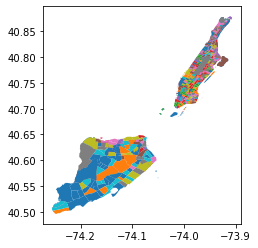

In [45]:
len(tract_01)
tract_01.plot(column='Families Median income ')

<AxesSubplot:>

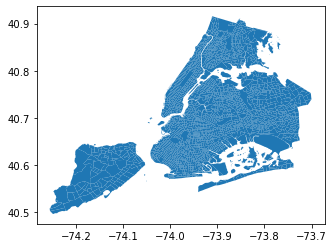

In [47]:
tract.plot()

In [49]:
# test
# income[''].where(df['postTestScore'] 50)
#
# # reading csv file from url
# data = pd.read_csv("https://media.geeksforgeeks.org/wp-content/uploads/nba.csv")
#
# # dropping null value columns to avoid errors
# data.dropna(inplace = True)
#
# # substring to be searched
# sub ='a'
#
# # creating and passsing series to new column
# data["Indexes"]= data["Name"].str.find(sub)
#
# # display
# data

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [50]:
tract['boro_code'].unique()


array(['5', '1', '3', '2', '4'], dtype=object)

In [52]:
play = geopandas.read_file('Source/census_nyc_playing.geojson')
play.head()


,GEOID,County,first_4_digits,boro,geometry
0,36005000100,Bronx County,3600,5000,"POLYGON ((-8223304.523 4981044.586, -8223307.3..."
1,36005000200,Bronx County,3600,5000,"POLYGON ((-8221503.700 4983296.896, -8221648.4..."
2,36005000400,Bronx County,3600,5000,"MULTIPOLYGON (((-8221072.012 4985004.760, -822..."
3,36005001600,Bronx County,3600,5001,"POLYGON ((-8221516.289 4986187.406, -8221497.4..."
4,36005001900,Bronx County,3600,5001,"MULTIPOLYGON (((-8226302.917 4982445.645, -822..."
